# CIFAR-10 Multiple Classes

+ [Load CIFAR10 dataset](#load)
+ [Visualizing the Image Data](#visualize)
+ [PreProcessing Data](#preprocessing)
    + [1.encoding Labels using one hot encoding](encoding)
    + [2.Normalizing Data](normalizing)
    + [3.Reshaping the Data](reshaping)
+ [Training the Model](#training)
    + [Which parameters should we set based on our data and can we play around](#parameters)
+ [Model Evaluation](#evaluation)
+ [Predicting a given image](#predicting)

https://www.cs.toronto.edu/~kriz/cifar.html

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


Here are the classes in the dataset, as well as 10 random images from each:
+ 0: airplane 										
+ 1: automobile 										
+ 2: bird 										
+ 3: cat 										
+ 4: deer 										
+ 5: dog 										
+ 6: frog 										
+ 7: horse 										
+ 8: ship 										
+ 9: truck 										

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# <a name='load'>Load CIRAR10 data set</a>

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170500096/170498071 [==============================] - 1297s 8us/step


# <a name='visualizing'>Visualizing the Image Data</a>

In [7]:
x_train.shape # 50,000 batch size, 32x32 image with 3 color channels (RBG)

(50000, 32, 32, 3)

In [8]:
x_train[0].shape # 32x32 image with 3 color channels (RBG)

(32, 32, 3)

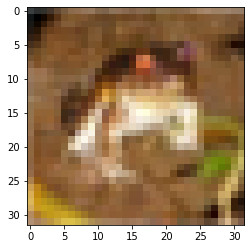

In [11]:
plt.imshow(x_train[0]);

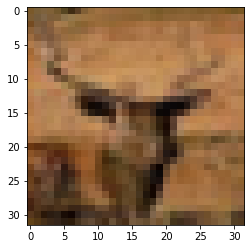

In [12]:
plt.imshow(x_train[1212]);

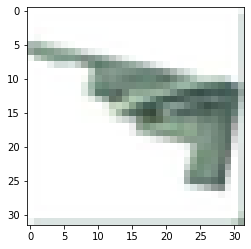

In [14]:
plt.imshow(x_train[12345]);

-------

# <a name='preprocessing'>PreProcessing Data</a>

# <a name='encoding'>1) encoding Labels Values using one hot encoding</a>

In [24]:
from tensorflow.keras.utils import to_categorical

In [27]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

We can see 0 index of y_train is frog with value 6. So if we look at original description, it is organized 0-9 for different types of images.

In [28]:
y_train[0] 

array([6], dtype=uint8)

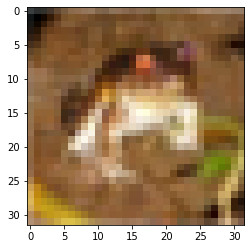

In [30]:
plt.imshow(x_train[0]);

-----

# <a name='normalizing'>2) Normalizing Image Data</a>

In [22]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
x_train[0].min(), x_train[0].max()

(0, 255)

In [19]:
x_train = x_train / 255
x_test = x_test / 255

In [20]:
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

In [23]:
x_train.shape

(50000, 32, 32, 3)

---

# <a name='reshaping'>3)Reshaping Image Data</a>

In this case, not necessary because our data is already in correct shape.

-----

# <a name='training'>Building the Model</a>

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [34]:
32*32*3 # single color image

3072

As we are dealing with more data points for color images (3072 data points for every single color image), we will use additional Convolutional Layer.

In [37]:
model = Sequential()

# 2 Convolutional Layers
# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu')) # we can change filters number here, but in our case images are simple so we will keep the same
# Pooling Layer
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# ------------------------

model.add(Dense(256, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



### Check model summary

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               409856    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

### add in Early Stopping

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

### Fit the model

In [41]:
model.fit(x=x_train, y=y_cat_train, 
              validation_data = (x_test, y_cat_test),
              epochs=15,
              callbacks= [early_stopping],
              verbose=1)

Epoch 1/15
1563/1563 [==============================] - 117s 75ms/step - loss: 1.4697 - accuracy: 0.4719 - val_loss: 1.2519 - val_accuracy: 0.5583
Epoch 2/15
1563/1563 [==============================] - 104s 67ms/step - loss: 1.1138 - accuracy: 0.6069 - val_loss: 1.1033 - val_accuracy: 0.6127
Epoch 3/15
1563/1563 [==============================] - 116s 74ms/step - loss: 0.9526 - accuracy: 0.6658 - val_loss: 1.0086 - val_accuracy: 0.6492
Epoch 4/15
1563/1563 [==============================] - 115s 73ms/step - loss: 0.8353 - accuracy: 0.7074 - val_loss: 0.9406 - val_accuracy: 0.6781
Epoch 5/15
1563/1563 [==============================] - 117s 75ms/step - loss: 0.7400 - accuracy: 0.7421 - val_loss: 0.9224 - val_accuracy: 0.6848
Epoch 6/15
1563/1563 [==============================] - 114s 73ms/step - loss: 0.6441 - accuracy: 0.7735 - val_loss: 0.9181 - val_accuracy: 0.6908
Epoch 7/15
1563/1563 [==============================] - 123s 78ms/step - loss: 0.5647 - accuracy: 0.8014 - val_loss: 1

# <a name='evaluation'>Model Evaluation </a>

### Visualization Metrics

In [43]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.469657,0.47194,1.251941,0.5583
1,1.113846,0.60692,1.103315,0.6127
2,0.952592,0.66576,1.008577,0.6492
3,0.835272,0.70736,0.940616,0.6781
4,0.739969,0.74212,0.922362,0.6848
5,0.644076,0.77354,0.918072,0.6908
6,0.564721,0.80144,1.003695,0.6890
7,0.489948,0.82720,1.007109,0.6915


In [45]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

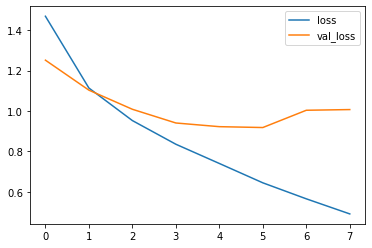

In [47]:
metrics[['loss', 'val_loss']].plot();

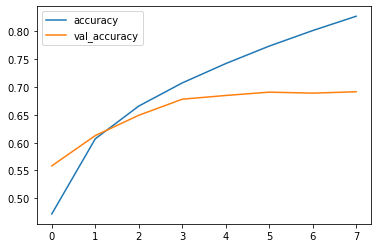

In [49]:
metrics[['accuracy', 'val_accuracy']].plot();

### Model Evaluate

In [50]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.0071094036102295, 0.6915000081062317]

### Classfication Report and Confusion Matrix

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [56]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1000
           1       0.82      0.82      0.82      1000
           2       0.66      0.49      0.56      1000
           3       0.50      0.53      0.51      1000
           4       0.60      0.67      0.63      1000
           5       0.57      0.61      0.59      1000
           6       0.84      0.69      0.76      1000
           7       0.72      0.77      0.74      1000
           8       0.82      0.76      0.79      1000
           9       0.74      0.83      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



### So how good is our accuracy?

We have to compare it with random guessing. In this case, we have 10 classes and random chances is 10% as baseline.

So if we compare this with 10%, our model 69% is performing pretty good.

If we look a the precision, recal andl f1 score, class 3 (cat) and 5(dog) are not doing well. This is because when the images are very small, it may be hard for model to recogize and differentiate between those images.

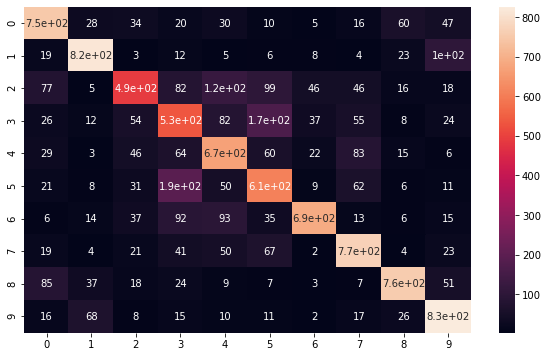

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True);

If we look at the heatmap, we can clearly see the model is confusing between Cat and Dog. Also between birds ans deers.

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

--------

# <a name='predicting'>Predicting a given image</a>

In [58]:
single_image = x_test[0]

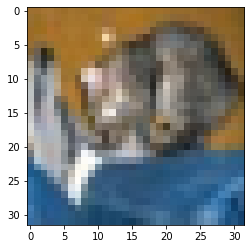

In [60]:
plt.imshow(single_image);

In [61]:
y_test[0]

array([3], dtype=uint8)

It is a cat (3)

### Make predictions

In [63]:
np.argmax(model.predict(single_image.reshape(1, 32, 32, 3)), axis=-1)# 1 image, 32x32, 3 color channels

array([3], dtype=int64)

Looks like our model is correctly predicting.

In [65]:
single_image = x_test[16]

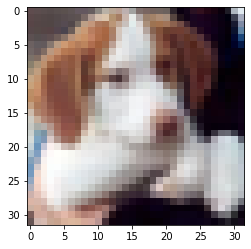

In [67]:
plt.imshow(single_image);

In [68]:
np.argmax(model.predict(single_image.reshape(1, 32, 32, 3)), axis=-1)

array([5], dtype=int64)